# Task 4 : Data Collection in the Wild

## Question 1

Q1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

### Loading data and tree models

**Please run the `preprocessing.ipynb` before going any furthur.**

In [12]:
import pickle
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

with open('./Models/dt1_model.sav', 'rb') as f:
    dt1 = pickle.load(f)
print(type(dt1))

with open('./Models/dt2_model.sav', 'rb') as f:
    dt2 = pickle.load(f)
print(type(dt2))

with open('./Models/dt3_model.sav', 'rb') as f:
    dt3 = pickle.load(f)
print(type(dt3))

sys.path.insert(0, os.path.abspath('..'))
from latexify import latexify, format_axes
latexify()

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_train = np.load('./Our_Saved/X_train.npy')
X_test = np.load('./Our_Saved/X_test.npy')
y_train = np.load('./Our_Saved/y_train.npy')
y_test = np.load('./Our_Saved/y_test.npy')

X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

print(X_combined.shape)
print(y_combined.shape)

X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

print(X_combined.shape)
print(y_combined.shape)

X_dt1=np.hstack((X_combined[:,:,0],X_combined[:,:,1],X_combined[:,:,2]))

print(f"X: {X_dt1.shape}")
print(f"y: {y_combined.shape}")

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
(24, 500, 3)
(24,)
(24, 500, 3)
(24,)
X: (24, 1500)
y: (24,)


### Plotting

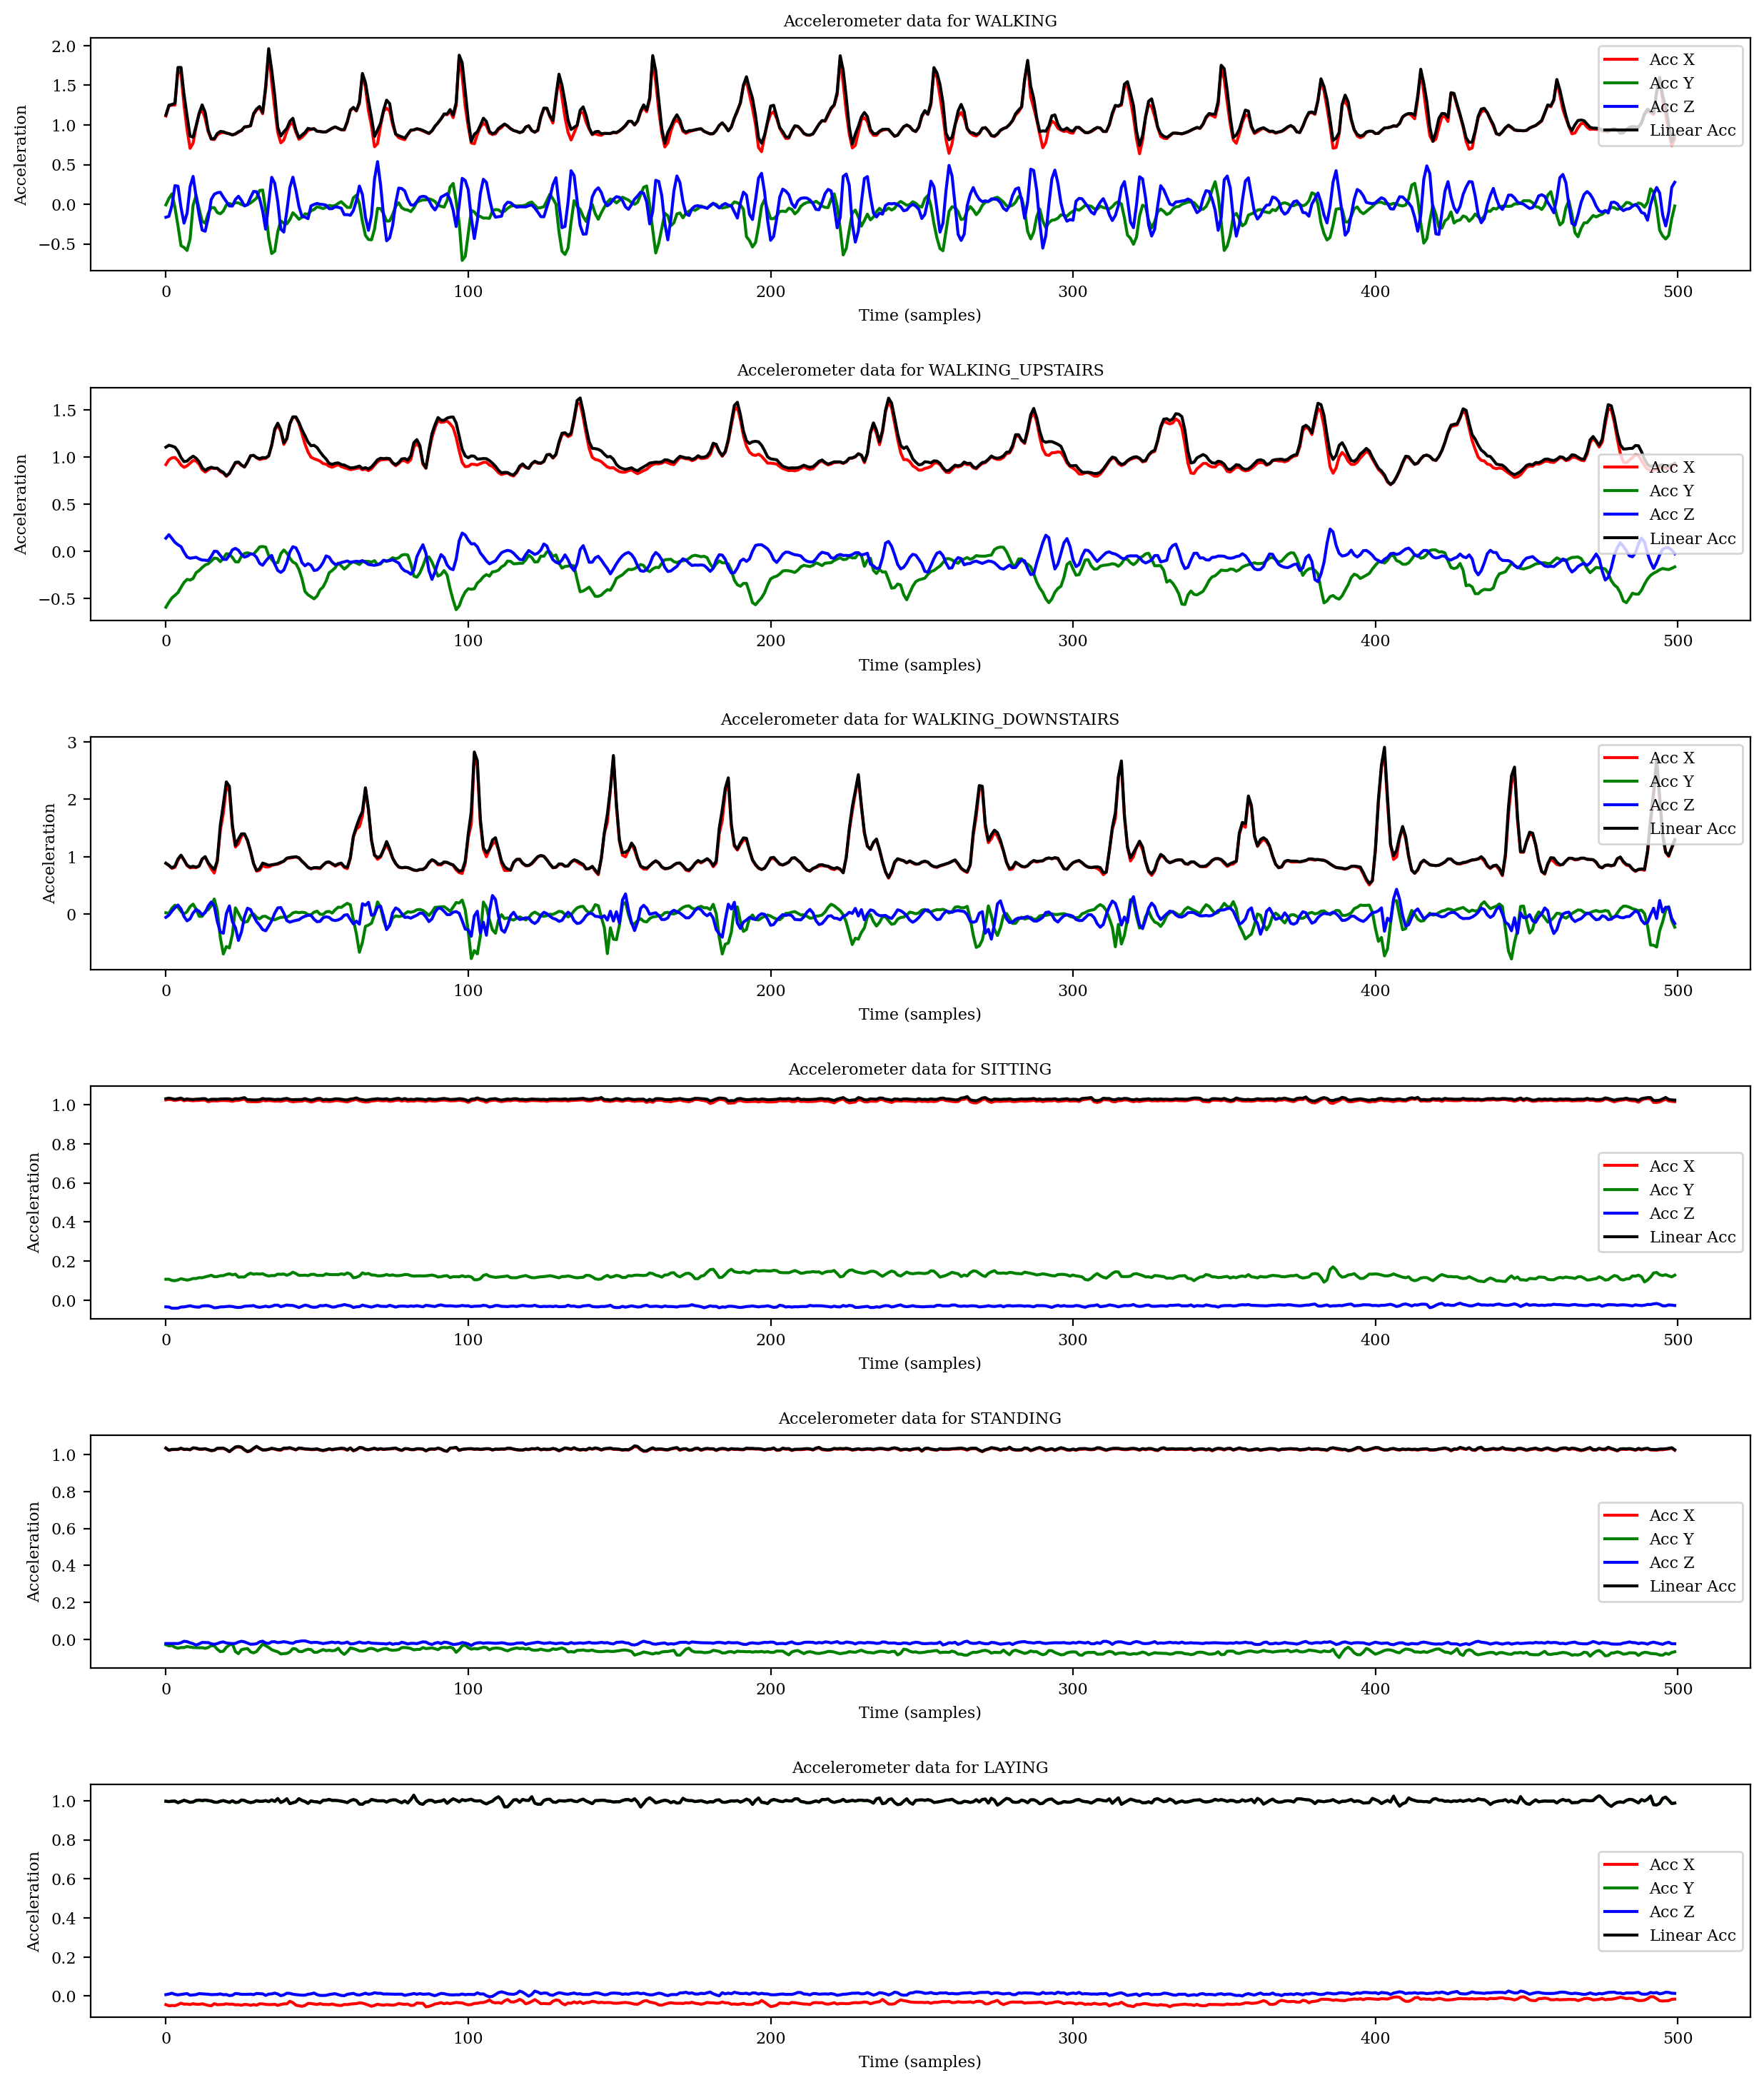

In [13]:
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# mapping class labels to activity names , as provided in activity_labels.txt
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}


activity_samples = {}# stores one sample from each activity class
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_combined[y_combined == activity_class][0]

# Set up the figure and gridspec
fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(len(classes), 1, hspace=0.5)

# Plot each activity's accelerometer data along with the linear acceleration
for i, (activity_name, sample) in enumerate(activity_samples.items()):
    ax = fig.add_subplot(gs[i, 0])
    
    # Calculate linear acceleration
    linear_acc = np.sqrt(np.sum(sample**2, axis=1))
    
    # Plot the x, y, z acceleration data
    ax.plot(sample[:, 0], label='Acc X', color='red')
    ax.plot(sample[:, 1], label='Acc Y', color='green')
    ax.plot(sample[:, 2], label='Acc Z', color='blue')
    
    # Plot the linear acceleration
    ax.plot(linear_acc, label='Linear Acc', color='black')
    
    ax.set_title(f"Accelerometer data for {activity_name}")
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Acceleration")
    ax.legend()

plt.show()

### Raw Data Decision Tree

In [14]:
from sklearn import metrics

y_dt1_pred = dt1.predict(X_dt1)

y_combined = np.array(y_combined)
y_dt1_pred = np.array(y_dt1_pred)

# Calculate metrics
accuracy = metrics.accuracy_score(y_combined, y_dt1_pred)
precision = metrics.precision_score(y_combined, y_dt1_pred, average='macro')
recall = metrics.recall_score(y_combined, y_dt1_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Create and display comparison DataFrame
comparison_df = pd.DataFrame({
    'True Label': y_combined,
    'Predicted Label': y_dt1_pred
})

Accuracy:  0.5416666666666666
Precision:  0.5416666666666666
Recall:  0.5416666666666666


### TSFEL Decision Tree

In [15]:
import tsfel

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_dt2 = tsfel.time_series_features_extractor(cfg, X_combined, verbose=1, fs=50)

print(f"X: {X_dt2.shape}")
print(f"y: {y_combined.shape}")

*** Feature extraction started ***



*** Feature extraction finished ***
X: (24, 1152)
y: (24,)


In [ ]:
from sklearn import metrics

y_dt2_pred = dt2.predict(X_dt2)

y_combined = np.array(y_combined)
y_dt2_pred = np.array(y_dt2_pred)

# Calculate metrics
accuracy = metrics.accuracy_score(y_combined, y_dt2_pred)
precision = metrics.precision_score(y_combined, y_dt2_pred, average='macro')
recall = metrics.recall_score(y_combined, y_dt2_pred, average='macro')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Create and display comparison DataFrame
comparison_df = pd.DataFrame({
    'True Label': y_combined,
    'Predicted Label': y_dt2_pred
})

# Display the DataFrame
print(comparison_df)

Accuracy:  0.6666666666666666
Precision:  0.6694444444444444
Recall:  0.6666666666666666
    True Label  Predicted Label
0            6                6
1            6                6
2            6                6
3            4                5
4            4                4
5            4                5
6            5                4
7            5                5
8            5                4
9            1                1
10           1                1
11           1                1
12           3                3
13           3                3
14           3                3
15           2                2
16           2                3
17           2                1
18           6                6
19           4                4
20           5                5
21           1                3
22           3                2
23           2                2


### UCI HAR Data

We cant use the decision tree modelled on 561 feature data provided by the author, because we have only measured x, y, z accelerations and we dont have access to all the other features provided by the author.

## Question 2

Q2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform?

### Training the tree directly on the collected data

In [5]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

X_train_stacked=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
X_test_stacked=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

print(f"X_train_stacked: {X_train_stacked.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test_stacked.shape}")
print(f"y_test: {y_test.shape}")

dt1=DecisionTreeClassifier(random_state=42)
dt1.fit(X_train_stacked,y_train)

y_pred_dt1=dt1.predict(X_test_stacked)

print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred_dt1))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred_dt1,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred_dt1,average='macro'))

X_train_stacked: (18, 1500)
y_train: (18,)
x_test: (6, 1500)
y_test: (6,)
Accuracy:  0.5
Precision:  0.4166666666666667
Recall:  0.5


c:\Users\Shardul Junagade\Desktop\ES-335-Assignment-1-2024-Fall\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Applying TSFEL featurization and PCA on the data

In [6]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test, verbose=1,fs =50)

print(f"X_train_tsfel: {X_train_tsfel.shape}")
print(f"X_test_tsfel: {X_test_tsfel.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")



# Highly correlated features are removed
corr_features = tsfel.correlated_features(X_train_tsfel, threshold=0.95)
X_train_tsfel.drop(corr_features, axis=1, inplace=True)
X_test_tsfel.drop(corr_features, axis=1, inplace=True)
print("Shape of train data after removing correlated features:",X_train_tsfel.shape)
print("Shape of test data after removing correlated features:",X_test_tsfel.shape)

# Remove low variance features
selector = VarianceThreshold(threshold = 0.1) # default is 0
X_train_tsfel = selector.fit_transform(X_train_tsfel)
X_test_tsfel = selector.transform(X_test_tsfel)
print("\nShape of train data after removing low variance features:",X_train_tsfel.shape)
print("Shape of test data after removing low variance features:",X_test_tsfel.shape)

# Normalising Features
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)
X_test_tsfel_scaled = scaler.transform(X_test_tsfel)

# Applying PCA
tsfel_pca = PCA(n_components=5)
X_train_tsfel_pca = tsfel_pca.fit_transform(X_train_tsfel_scaled)
X_test_tsfel_pca = tsfel_pca.transform(X_test_tsfel_scaled)

print("Training data shape after PCA: ",X_train_tsfel_pca.shape)
print("Testing data shape after PCA: ",X_test_tsfel_pca.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_tsfel: (18, 1152)
X_test_tsfel: (6, 1152)
y_train: (18,)
y_test: (6,)
Shape of train data after removing correlated features: (18, 519)
Shape of test data after removing correlated features: (6, 519)

Shape of train data after removing low variance features: (18, 100)
Shape of test data after removing low variance features: (6, 100)
Training data shape after PCA:  (18, 5)
Testing data shape after PCA:  (6, 5)


### Training the tree on processed data

In [7]:
dt3=DecisionTreeClassifier(random_state=42)
dt3.fit(X_train_tsfel_pca,y_train)

y_tsfel_pca_pred=dt3.predict(X_test_tsfel_pca)

print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_tsfel_pca_pred))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_tsfel_pca_pred,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_tsfel_pca_pred,average='macro'))

Accuracy:  0.6666666666666666
Precision:  0.5555555555555555
Recall:  0.6666666666666666


c:\Users\Shardul Junagade\Desktop\ES-335-Assignment-1-2024-Fall\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Question 3

Q3. Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform?

In [8]:
import time
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

api_keys = os.getenv('GROQ_API_KEYS').split(',') # Do not share this key with anyone
current_index =0

# Define the model mapping
groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
reverse_activity_labels = {v: k for k, v in activity_labels.items()}

print("Activity Labels Dictionary: ", reverse_activity_labels)

Activity Labels Dictionary:  {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3, 'SITTING': 4, 'STANDING': 5, 'LAYING': 6}


In [9]:
# Raw data collected by UCI
X_train_UCI = np.load('../Saved_Datasets/Raw_Acc_Data/X_train.npy')
X_test_UCI = np.load('../Saved_Datasets/Raw_Acc_Data/X_test.npy')
y_train_UCI = np.load('../Saved_Datasets/Raw_Acc_Data/y_train.npy')
y_test_UCI = np.load('../Saved_Datasets/Raw_Acc_Data/y_test.npy')

X_train_UCI =np.hstack((X_train_UCI[:,:,0],X_train_UCI[:,:,1],X_train_UCI[:,:,2]))
X_test_UCI =np.hstack((X_test_UCI[:,:,0],X_test_UCI[:,:,1],X_test_UCI[:,:,2]))

print("X_train UCI shape: ", X_train_UCI.shape)
print("X_test UCI shape: ", X_test_UCI.shape)
print("y_train UCI shape: ", y_train_UCI.shape)
print("y_test UCI shape: ", y_test_UCI.shape)

# Data collected in the wild 
X_train = np.load('./Our_Saved/X_train.npy')
X_test = np.load('./Our_Saved/X_test.npy')
y_train = np.load('./Our_Saved/y_train.npy')
y_test = np.load('./Our_Saved/y_test.npy')

X_train=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
X_test=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Taking first 600 time steps because of the limitation of the model
X_train = X_train[:,:600]
X_test = X_test[:,:600]
print("Shapes after taking first 600 time steps")
print(f"x_train: {X_train.shape}")
print(f"x_test: {X_test.shape}")

X_train UCI shape:  (126, 1500)
X_test UCI shape:  (54, 1500)
y_train UCI shape:  (126,)
y_test UCI shape:  (54,)
X_train: (18, 1500)
X_test: (6, 1500)
Shapes after taking first 600 time steps
x_train: (18, 600)
x_test: (6, 600)


In [10]:
# List of API keys
api_key_index = 0  # Initialize index for API key rotation

# Set up your Groq model
model_name = "llama3.1-70b"


def make_api_call(prompt):
    global api_key_index
    retry_count = 0
    max_retries = len(api_keys)

    while retry_count < max_retries:
        try:
            api_key = api_keys[api_key_index]
            llm = ChatGroq(model=groq_models[model_name], api_key=api_key, temperature=0)
            response = llm.invoke(prompt)
            return response
        except Exception as e:
            #print(f"Rate limit error with API key {api_key_index}. Error: {e}. Retrying with next key...")
            api_key_index = (api_key_index + 1) % len(api_keys)  # move to the next API key after a failure
            retry_count += 1
            time.sleep(1)  # Wait before retrying

    print("All API keys exhausted. Cannot get a response from the API.")
    raise RuntimeError("Maximum retries reached. Failed to get a response from the API.")

def select_samples_per_activity(labels, samples_per_activity, num_activities=6): # function to select samples_per_activity from each activity
    selected_indices = []
    activity_count = {i: 0 for i in range(1, num_activities + 1)}

    for i, label in enumerate(labels):
        if activity_count[label] < samples_per_activity:
            selected_indices.append(i)
            activity_count[label] += 1
        if all(count == samples_per_activity for count in activity_count.values()):
            break

    return selected_indices


3
Test Case 1 (LAYING):
Predicted label: 3
True label: 6
--------------------------------------------------
5
Test Case 2 (SITTING):
Predicted label: 5
True label: 4
--------------------------------------------------
3
Test Case 3 (STANDING):
Predicted label: 3
True label: 5
--------------------------------------------------
Rate limit error with API key 1. Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-70b-versatile` in organization `org_01j6carxhde7qaa5nkrjzhpnmh` on : Limit 1000000, Used 1047309, Requested 47684. Please try again in 2h16m47.4244s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}. Retrying with next key...
3
Test Case 4 (WALKING):
Predicted label: 3
True label: 1
--------------------------------------------------
Rate limit error with API key 2. Error: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-70b-versatile` in organizatio

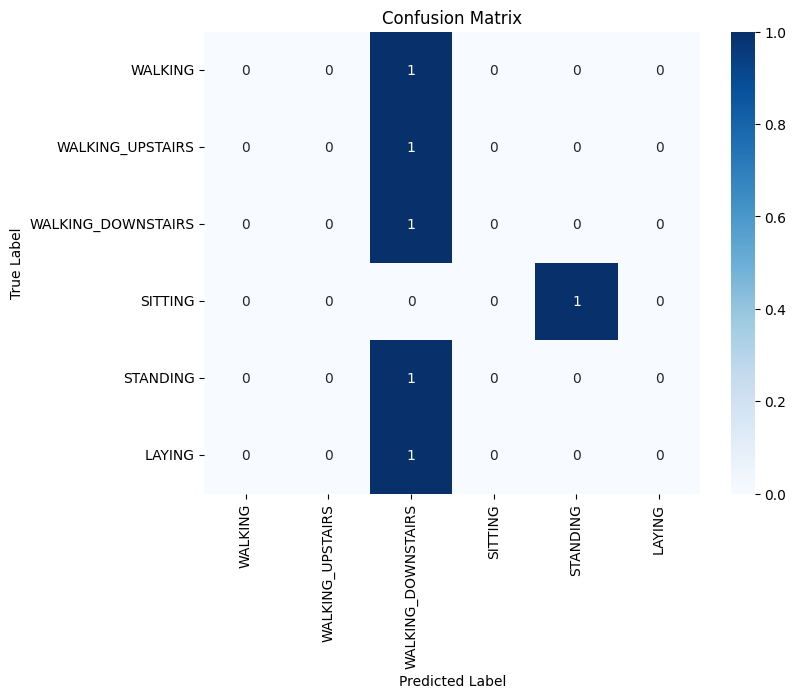

In [ ]:
# Select even samples for few-shot learning examples
samples_per_activity_train = 2
few_shot_indices = select_samples_per_activity(y_train_UCI, samples_per_activity_train)
few_shot_examples = [
    {"input": X_train_UCI[i].tolist(), "label": y_train_UCI[i]} for i in few_shot_indices
]

# Function to create a few-shot learning prompt
def create_few_shot_prompt(examples, query_input):
    description = '''
        You are a highly trained human activity classification model.
        Each input is a 1x600 vector containing numerical values that represent acceleration values x, y, z stacked horizontally at an instant of time.
        Your task is to classify the input vector into one of the following categories:
        - 1: WALKING
        - 2: WALKING_UPSTAIRS
        - 3: WALKING_DOWNSTAIRS
        - 4: SITTING 
        - 5: STANDING
        - 6: LAYING

        Here are a few examples:\n
    '''
    prompt = description
    for ex in examples:
        example_input = ",".join(map(str, ex['input']))
        prompt += f"Input: [{example_input}]\nLabel: {ex['label']}\n\n" 
        
    query_input_str = ",".join(map(str, query_input))
    prompt += f"Now, classify the following input vector and return ONLY the number.\nInput: [{query_input_str}]\nLabel: "
    return prompt

# Select 1 samples from each activity for testing
samples_per_activity_test = 1
selected_indices = select_samples_per_activity(y_test, samples_per_activity_test)

# Store predictions and true labels
predictions = []
true_labels = []

# Test the selected cases
for idx in selected_indices:
    query_input = X_test[idx].tolist()
    true_label = y_test[idx]
    prompt = create_few_shot_prompt(few_shot_examples, query_input)
    
    # Make the API call and store the prediction
    answer = make_api_call(prompt)
    print(answer.content)
    predicted_label = int(answer.content.strip())
    predictions.append(predicted_label)
    true_labels.append(true_label)
    
    # Print the predicted and true labels
    print(f"Test Case {idx + 1} ({activity_labels[true_label]}):")
    print(f"Predicted label: {predicted_label}")
    print(f"True label: {true_label}")
    print("-" * 50)

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=[1, 2, 3, 4, 5, 6])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'], 
            yticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
if not os.path.exists('./Saved_Images/'):
    os.makedirs('./Saved_Images/')
plt.savefig('./Saved_Images/image3.png')
plt.show()

## Question 4

Q4. Use the Few-Shot prompting method using the data you collected to predict the activities that you performed. Adopt proper processing methods as needed. How did the model perform?

(18, 500, 3)
(6, 500, 3)
y_train: (18,)
y_test: (6,)
x_train: (18, 1500)
x_test: (6, 1500)
x_train: (18, 600)
x_test: (6, 600)
content='6' response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 56209, 'total_tokens': 56211, 'completion_time': 0.008221374, 'prompt_time': 13.328977727, 'queue_time': 0.012022175000000246, 'total_time': 13.337199101}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_5c5d1b5cfb', 'finish_reason': 'stop', 'logprobs': None} id='run-a4cb9446-5314-4cae-a21a-b701bc5c3c79-0' usage_metadata={'input_tokens': 56209, 'output_tokens': 2, 'total_tokens': 56211}
Test Case 1 (LAYING):
Predicted label: 6
True label: 6
--------------------------------------------------
content='4' response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 56200, 'total_tokens': 56202, 'completion_time': 0.008063879, 'prompt_time': 13.257100238, 'queue_time': 0.01107172700000092, 'total_time': 13.265164117}, 'model_name': 'llama-3.1-70

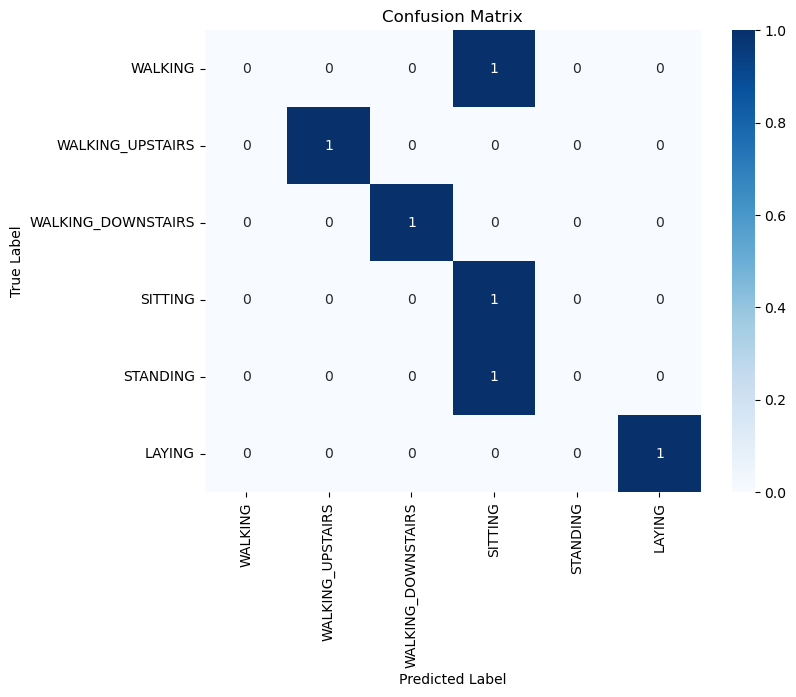

In [ ]:
# Select even samples for few-shot learning examples

samples_per_activity_train = 3
few_shot_indices = select_samples_per_activity(y_train, samples_per_activity_train)
# Create few-shot examples
few_shot_examples = [
    {"input": X_train[i].tolist(), "label": y_train[i]} for i in few_shot_indices
]

# Function to create a few-shot learning prompt
def create_few_shot_prompt(examples, query_input):
    description = '''
        You are a highly trained human activity classification model.
        Each input is a 1x600 vector containing numerical values that represent acceleration values (x, y, z) stacked horizontally at an instant of time.
        Your task is to classify the input vector into one of the following categories:
        - 1: WALKING
        - 2: WALKING_UPSTAIRS
        - 3: WALKING_DOWNSTAIRS
        - 4: SITTING 
        - 5: STANDING
        - 6: LAYING

        Here are a few examples:\n
    '''
    prompt = description
    for ex in examples:
        example_input = ",".join(map(str, ex['input']))
        prompt += f"Input: [{example_input}]\nLabel: {ex['label']}\n\n" 
        
    query_input_str = ",".join(map(str, query_input))
    prompt += f"Now, classify the following input vector and return ONLY the number.\nInput: [{query_input_str}]\nLabel: "
    return prompt


# Select 1 samples from each activity for testing
samples_per_activity_test = 1
selected_indices = select_samples_per_activity(y_test, samples_per_activity_test)

# Store predictions and true labels
predictions = []
true_labels = []

# Test the selected cases
for idx in selected_indices:
    query_input = X_test[idx].tolist()
    true_label = y_test[idx]
    prompt = create_few_shot_prompt(few_shot_examples, query_input)
    
    # Make the API call and store the prediction
    answer = make_api_call(prompt)
    print(answer)
    predicted_label = int(answer.content.strip())
    predictions.append(predicted_label)
    true_labels.append(true_label)
    
    # Print the predicted and true labels
    print(f"Test Case {idx + 1} ({activity_labels[true_label]}):")
    print(f"Predicted label: {predicted_label}")
    print(f"True label: {true_label}")
    print("-" * 50)

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")


# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=[1, 2, 3, 4, 5, 6])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'], 
            yticklabels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])
plt.xlabel('Predicted Label')
if not os.path.exists('./Saved_Images/'):
    os.makedirs('./Saved_Images/')
plt.savefig('./Saved_Images/image4.png')
plt.ylabel('True Label')
plt.title('Confusion Matrix')